<a href="https://colab.research.google.com/github/LukeBlanch/CAP4630-Artificial-Intelligence/blob/master/HW_3/HW_3_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 Problem 3:
## Luke Blanchard

## Imports

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Define parameters:

In [0]:
w = 1
b = 1
mu = .7
sigma = .2
m = 500

## get_random_data

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m,2))
  labels = np.empty((m))

  for i in range(m):
    # Let the class label be 0 or 1 with equal probability
    labels[i] = random.randint(0,1)
    # Let x_1 be random between [0, 1)
    data[i][0] = random.random()
    # Calculate x_2 from x_1 and given parameters
    data[i][1] = w * data[i][0] + b + pow(-1, labels[i]) * np.random.default_rng().normal(mu, sigma)

  return (data, labels)

## display_random_data

In [0]:
def display_random_data(data, labels):
  for i in range(len(labels)):
    if (labels[i] == 0):
      plt.scatter(data[i][0], data[i][1], c='b', s=10)
    else:
      plt.scatter(data[i][0], data[i][1], c='r', s=10)

  # Display the dividing line
  x = np.array(range(0,2))  
  y = eval('w * x + b')
  plt.plot(x, y,'green')  

## Activation Function: Sigmoid

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Cost Function:

In [0]:
def cost(data, labels, theta):
    m = len(labels)
    h = sigmoid(data @ theta)
    epsilon = 1e-5
    return (1/m)*(((-labels).T @ np.log(h + epsilon))-((1-labels).T @ np.log(1-h + epsilon)))

## Gradient Descent

In [0]:
def gradient_descent(data, labels, params, learning_rate, iterations):
    m = len(labels)
    past_cost = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (data.T @ (sigmoid(data @ params) - labels)) 
        past_cost[i] = cost(data, labels, params)

    return (past_cost, params)

## Prediction Function

In [0]:
def predict(data, params):
    return np.round(sigmoid(data @ params))

# Generate data

In [0]:
originalData, originalLabels = get_random_data(w, b, mu, sigma, m)

# Train the model

In [0]:
labels = originalLabels[:,np.newaxis]

m = len(labels)

data = np.hstack((np.ones((m,1)),originalData))
n = np.size(data,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.01

initial_cost = cost(data, labels, params)

past_cost, params_optimal = gradient_descent(data, labels, params, learning_rate, iterations)

## Display the data:
### The green line is the line used to generate the data, and the black line is the one produced by the trained model

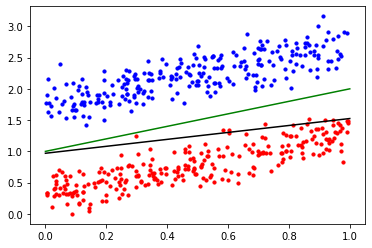

In [11]:
display_random_data(originalData, originalLabels)

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

x = np.array(range(0,2))
y = intercept + (slope * x)
plt.plot(x, y, 'black');